In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Option 1: Escape backslashes
dataset = "C:\\Users\\vkred\\Downloads\\family_financial_and_transactions_data.xlsx"

# Option 2: Use a raw string
dataset = r"C:\Users\vkred\Downloads\family_financial_and_transactions_data.xlsx"

# Load the Excel file
import pandas as pd
df = pd.read_excel(dataset, sheet_name='final_family_financial_and_tran')


In [3]:
df

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68
...,...,...,...,...,...,...,...,...,...,...,...,...
16301,FAM200,FAM200_Member6,2024-10-10,Groceries,79.99,44621,44081,4296,2470,2831,4,92
16302,FAM200,FAM200_Member6,2024-10-22,Education,228.39,44621,44081,4296,2470,2831,4,92
16303,FAM200,FAM200_Member6,2024-10-29,Travel,258.63,44621,44081,4296,2470,2831,4,92
16304,FAM200,FAM200_Member6,2024-10-26,Travel,467.46,44621,44081,4296,2470,2831,4,92


In [4]:
df.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


In [5]:
df.shape

(16306, 12)

In [6]:
df.info() #no null values are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16306 entries, 0 to 16305
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Family ID                16306 non-null  object        
 1   Member ID                16306 non-null  object        
 2   Transaction Date         16306 non-null  datetime64[ns]
 3   Category                 16306 non-null  object        
 4   Amount                   16306 non-null  float64       
 5   Income                   16306 non-null  int64         
 6   Savings                  16306 non-null  int64         
 7   Monthly Expenses         16306 non-null  int64         
 8   Loan Payments            16306 non-null  int64         
 9   Credit Card Spending     16306 non-null  int64         
 10  Dependents               16306 non-null  int64         
 11  Financial Goals Met (%)  16306 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

In [7]:
family_spending = df.groupby('Family ID').agg({'Income': 'first',  'Savings': 'first','Monthly Expenses': 'first','Loan Payments': 'first','Credit Card Spending': 'sum',  'Financial Goals Met (%)': 'first', 'Amount': 'sum'  }).reset_index()

In [8]:
family_spending

,Family ID,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Financial Goals Met (%),Amount
0,FAM001,113810,20234,5781,2422,275187,68,23188.90
1,FAM002,44592,29492,5630,4541,87560,60,22309.71
2,FAM003,33278,11365,5282,1042,132446,100,11220.34
3,FAM004,127196,30735,3591,1571,63460,82,23483.10
4,FAM005,66048,1212,3136,3444,317130,89,40246.21
...,...,...,...,...,...,...,...,...
195,FAM196,64973,3604,3533,622,92256,26,31433.34
196,FAM197,130741,41591,6463,4850,22401,62,4032.82
197,FAM198,114012,6372,4345,1989,133684,51,19378.59
198,FAM199,74587,28474,3672,834,343629,36,31009.65


In [9]:
family_spending['Savings_to_Income'] = family_spending['Savings'] / family_spending['Income']
family_spending['Expenses_to_Income'] = family_spending['Monthly Expenses'] / family_spending['Income']


In [10]:
print("\nFamily-Level Spending Patterns:")
family_spending


Family-Level Spending Patterns:


,Family ID,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Financial Goals Met (%),Amount,Savings_to_Income,Expenses_to_Income
0,FAM001,113810,20234,5781,2422,275187,68,23188.90,0.177788,0.050795
1,FAM002,44592,29492,5630,4541,87560,60,22309.71,0.661374,0.126256
2,FAM003,33278,11365,5282,1042,132446,100,11220.34,0.341517,0.158723
3,FAM004,127196,30735,3591,1571,63460,82,23483.10,0.241635,0.028232
4,FAM005,66048,1212,3136,3444,317130,89,40246.21,0.018350,0.047481
...,...,...,...,...,...,...,...,...,...,...
195,FAM196,64973,3604,3533,622,92256,26,31433.34,0.055469,0.054376
196,FAM197,130741,41591,6463,4850,22401,62,4032.82,0.318117,0.049434
197,FAM198,114012,6372,4345,1989,133684,51,19378.59,0.055889,0.038110
198,FAM199,74587,28474,3672,834,343629,36,31009.65,0.381756,0.049231


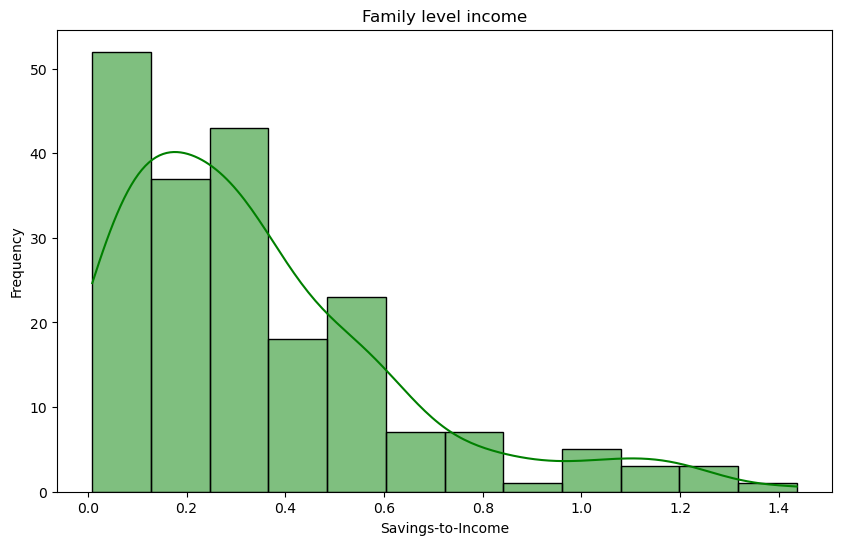

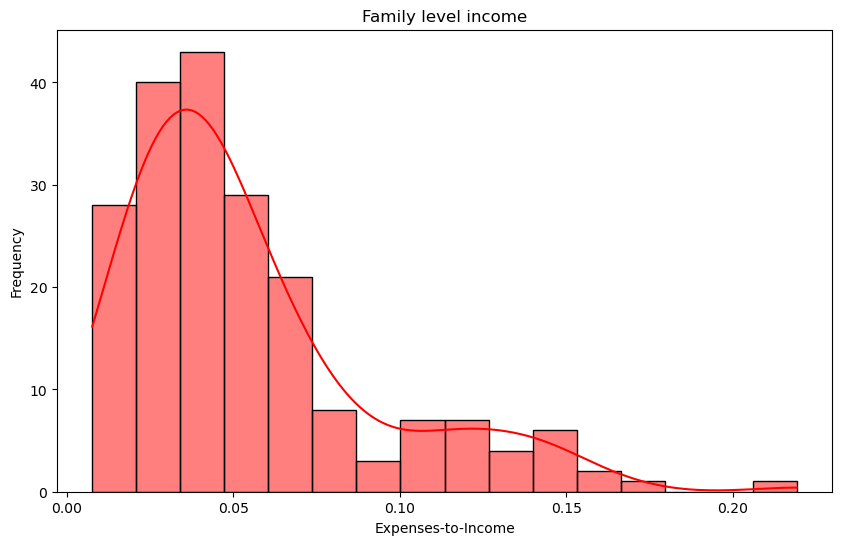

In [11]:
# Plot histogram for Savings-to-Income ratio
plt.figure(figsize=(10, 6))
sns.histplot(family_spending['Savings_to_Income'], kde=True, color='green')
plt.title('Family level income')
plt.xlabel('Savings-to-Income')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for Expenses-to-Income ratio
plt.figure(figsize=(10, 6))
sns.histplot(family_spending['Expenses_to_Income'], kde=True, color='red')
plt.title('Family level income')
plt.xlabel('Expenses-to-Income')
plt.ylabel('Frequency')
plt.show()


In [12]:
member_spending = df.groupby(['Family ID', 'Member ID']).agg({'Amount': 'sum'}).reset_index()

In [13]:
print("\nMember-Level Spending Patterns:")
member_spending


Member-Level Spending Patterns:


,Family ID,Member ID,Amount
0,FAM001,FAM001_Member1,6521.20
1,FAM001,FAM001_Member2,7084.83
2,FAM001,FAM001_Member3,2119.41
3,FAM001,FAM001_Member4,7463.46
4,FAM002,FAM002_Member1,3082.90
...,...,...,...
921,FAM200,FAM200_Member2,2103.85
922,FAM200,FAM200_Member3,4671.33
923,FAM200,FAM200_Member4,3739.52
924,FAM200,FAM200_Member5,5408.28


In [ ]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Member ID', y='Amount', data=member_spending, hue='Family ID', palette='Set2')
plt.title('Total Spending per Member')
plt.xlabel('Member ID')
plt.ylabel('Total Spending')
plt.legend(title='Family ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [ ]:
correlation_data = family_spending[['Income', 'Savings', 'Monthly Expenses', 'Loan Payments', 'Credit Card Spending']]
correlation_matrix = correlation_data.corr()

In [ ]:
print("\nCorrelation Matrix:")
correlation_matrix

In [ ]:
correlation_matrix = correlation_matrix.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Financial Metrics')
plt.show()

In [ ]:
family_metrics = df.groupby('Family ID').agg({'Income': 'mean', 'Savings': 'mean','Monthly Expenses': 'mean','Loan Payments': 'mean','Credit Card Spending': 'mean','Financial Goals Met (%)': 'mean'}).reset_index()

In [ ]:
#savings to income ratio
family_metrics['Savings-to-Income Ratio'] = family_metrics['Savings'] / family_metrics['Income']

In [ ]:
#monthly expenses as percentage of income
family_metrics['Monthly Expense Ratio'] = family_metrics['Monthly Expenses'] / family_metrics['Income']


In [ ]:
#Loan Payments as a Percentage of Income
family_metrics['Loan Payment Ratio'] = family_metrics['Loan Payments'] / family_metrics['Income']


In [ ]:
#credit card spending trends
credit_card_trends = df.groupby(['Family ID', 'Transaction Date'])['Credit Card Spending'].sum().reset_index()
credit_card_avg_trends = credit_card_trends.groupby('Family ID')['Credit Card Spending'].mean()
family_metrics = family_metrics.merge(credit_card_avg_trends, on='Family ID', suffixes=('', '_Trend'))


In [ ]:
#spending category distribution
category_spending = df.groupby(['Family ID', 'Category'])['Amount'].sum().unstack(fill_value=0)
discretionary_categories = ['Travel', 'Entertainment']
family_metrics['Discretionary Spending Ratio'] = category_spending[discretionary_categories].sum(axis=1) / category_spending.sum(axis=1)


In [ ]:
family_metrics[['Family ID', 'Savings-to-Income Ratio', 'Monthly Expense Ratio', 
                      'Loan Payment Ratio', 'Credit Card Spending_Trend', 
                      'Discretionary Spending Ratio', 'Financial Goals Met (%)']]
